
--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow_Duration                100 non-null    float64
 1   Total_Fwd_Packets            100 non-null    int64  
 2   Total_Bwd_Packets            100 non-null    int64  
 3   Total_Length_of_Fwd_Packets  100 non-null    int64  
 4   Total_Length_of_Bwd_Packets  100 non-null    int64  
 5   Fwd_Packet_Length_Max        100 non-null    int64  
 6   Fwd_Packet_Length_Min        100 non-null    int64  
 7   Protocol                     100 non-null    int64  
 8   Flow_Bytes/s                 100 non-null    float64
 9   Flow_Packets/s               100 non-null    float64
 10  Packet_Length_Variance       100 non-null    float64
 11  Label                        100 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 9

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Random Forest Performance:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.54      0.47      0.47        20
weighted avg       0.67      0.75      0.67        20


Support Vector Machine Performance:
Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.67      0.67      0.67         3
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         1

    accuracy                           0.70  

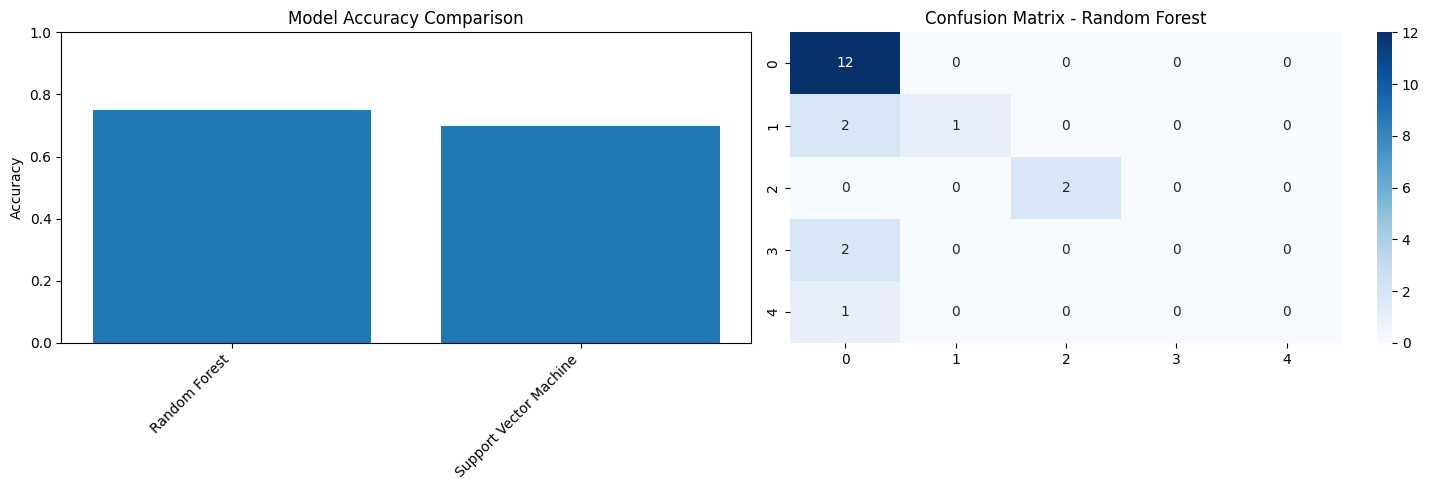

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load and clean the dataset, handling potential data issues

    Args:
        file_path (str): Path to the CSV file

    Returns:
        DataFrame: Cleaned dataset
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # Replace infinity with NaN
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

        # Display basic information
        print("\n--- Dataset Information ---")
        print(df.info())

        # Check for missing values
        print("\n--- Missing Values ---")
        print(df.isnull().sum())

        # Check for columns with extreme values
        print("\n--- Column Statistics ---")
        print(df.describe())

        return df

    except Exception as e:
        print(f"Error loading the file: {e}")
        return None

def preprocess_data(df, target_column='Label'):
    """
    Clean and preprocess the dataset with robust handling

    Args:
        df (DataFrame): Input dataset
        target_column (str): Name of the target column

    Returns:
        tuple: Preprocessed features and target
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Impute missing and infinite values
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Encode target variable
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Scale features with robust scaling
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return X_scaled, y, X_imputed.columns

def train_and_evaluate_models(X, y):
    """
    Train multiple models and compare their performance

    Args:
        X (array): Scaled feature matrix
        y (array): Target variable

    Returns:
        dict: Model performance metrics
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models with more robust parameters
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight='balanced'
        ),
        'Support Vector Machine': SVC(
            kernel='rbf',
            random_state=42,
            class_weight='balanced',
            probability=True
        )
    }

    # Store results
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluation metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }

    return results

def visualize_results(results):
    """
    Create comprehensive visualizations

    Args:
        results (dict): Model performance results
    """
    plt.figure(figsize=(15, 5))

    # Accuracy Comparison
    plt.subplot(1, 2, 1)
    model_names = list(results.keys())
    accuracies = [results[model]['Accuracy'] for model in model_names]

    plt.bar(model_names, accuracies)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')

    # Confusion Matrix for Best Model
    plt.subplot(1, 2, 2)
    best_model = model_names[np.argmax(accuracies)]
    cm = results[best_model]['Confusion Matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model}')

    plt.tight_layout()
    plt.show()

def main(file_path):
    """
    Main function to orchestrate the entire analysis process

    Args:
        file_path (str): Path to the CSV file
    """
    # Load and clean dataset
    df = load_and_clean_data(file_path)

    if df is None:
        print("Failed to load the dataset. Please check the file path.")
        return

    # Preprocess data
    X, y, selected_features = preprocess_data(df)

    # Train and evaluate models
    results = train_and_evaluate_models(X, y)

    # Print detailed results
    for model_name, metrics in results.items():
        print(f"\n{model_name} Performance:")
        print(f"Accuracy: {metrics['Accuracy']}")
        print("Classification Report:")
        print(metrics['Classification Report'])

    # Visualize results
    visualize_results(results)

# Example usage in Colab
file_path = '/content/synthetic_cyber_threats.csv'
main(file_path)